## CA 1, LLMs Spring 2024

- **Name:** Melika Noubakhtian
- **Student ID:** 4021305965008

---
### This is due on **April 2nd, 2024**, submitted via Microsoft Teams
#### Your submission should be named using the following format: `CA1_LASTNAME_STUDENTID.ipynb`.

### **IMPORTANT**: After copying this notebook to your Google Drive, please paste a link to it below. To get a publicly-accessible link, hit the *Share* button at the top right, then click "Get shareable link" and copy over the result. If you fail to do this, you will receive no credit for this homework!
# ***LINK: https://colab.research.google.com/drive/1Yu-QpaQkKOLd4TFxSH2NcEOgymPe47B-?usp=sharing***

---

##### *How to do this problem set:*

- Some questions require writing Python code and computing results, and the rest of them have written answers. For coding problems, you will have to fill out all code blocks that say `YOUR CODE HERE`.

- For text-based answers, you should replace the text that says "Write your answer here..." with your actual answer.

- There is no penalty for using AI assistance on this homework as long as you fully disclose it in the final cell of this notebook (this includes storing any prompts that you feed to large language models). That said, anyone caught using AI assistance without proper disclosure will receive a zero on the assignment (we have several automatic tools to detect such cases). We're literally allowing you to use it with no limitations, so there is no reason to lie!

---

##### *Academic honesty*

- We will audit the Colab notebooks from a set number of students, chosen at random. The audits will check that the code you wrote actually generates the answers in your notebook. If you turn in correct answers on your notebook without code that actually generates those answers, we will consider this a serious case of cheating.

- We will also run automatic checks of Colab notebooks for plagiarism. Copying code from others is also considered a serious case of cheating.

---

If you have any further questions or concerns, contact the TAs via Telegram:

* [Mohammad Azimi](https://t.me/nooooooooppp)
* [Sina Abbasi](https://t.me/SinaAbbasi1)  


---

# Part 1: Word Embeddings and Masked LMs (40 points)

### Question 1.1 (5 points)

In this part, we will start with `GloVe` [(Pennington et al.)](https://aclanthology.org/D14-1162.pdf) word embeddings. `GloVe` provides low-dimensional dense vectors representing words' semantics. The distance between `GloVe` embeddings captures the semantic relationships of words. We are using the `Gensim` library for  working with `GloVe` embeddings. Let's install `Gensim` and download the 6B token model. Also, we should unzip the model file. Running the cell below could take a few minutes.

In [ ]:
!pip install gensim
!wget https://nlp.stanford.edu/data/glove.6B.zip
!unzip "/content/glove.6B.zip"

--2024-04-02 17:08:04--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-04-02 17:08:04--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.01MB/s    in 2m 38s  

2024-04-02 17:10:43 (5.19 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]

Archive:  /content/glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
 

We are using the model file with 6 billion tokens containing 200-dimensional vectors. Running the cell below will create the word embedding model.

In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

glove_input_file = 'glove.6B.200d.txt'
model = KeyedVectors.load_word2vec_format(glove_input_file, binary=False, no_header=True)

Try to write the 5 most similar words to **computer**, **football**, **ocean**, **music**, and **artificial** along with their similarity scores.

In [ ]:
## WRITE YOUR CODE HERE!
model.most_similar('computer')[:5]

[('computers', 0.8357723951339722),
 ('software', 0.7828460335731506),
 ('technology', 0.6907660961151123),
 ('pc', 0.6647984385490417),
 ('systems', 0.658431887626648)]

In [ ]:
model.most_similar('football')[:5]

[('soccer', 0.8105178475379944),
 ('basketball', 0.7896140813827515),
 ('league', 0.716710090637207),
 ('baseball', 0.7023130655288696),
 ('rugby', 0.7006953358650208)]

In [ ]:
model.most_similar('ocean')[:5]

[('sea', 0.7277445197105408),
 ('waters', 0.724154531955719),
 ('coast', 0.6972916126251221),
 ('atlantic', 0.6918381452560425),
 ('seas', 0.6812019348144531)]

In [ ]:
model.most_similar('music')[:5]

[('musical', 0.7338810563087463),
 ('songs', 0.7253574728965759),
 ('pop', 0.6906009912490845),
 ('musicians', 0.6876541972160339),
 ('recording', 0.6848656535148621)]

In [ ]:
model.most_similar('artifical')[:5]

[('inseminations', 0.5080195665359497),
 ('alcohol-induced', 0.4810210168361664),
 ('2teaspoons', 0.4769013524055481),
 ('oligopolistic', 0.4658466875553131),
 ('80-point', 0.46400707960128784)]

**Analogy** in word embeddings refers to performing algebraic operations on vectors to capture the most similar words to the resulting embedding. One of the most famous examples is the analogy *king - man + woman = queen*. In `Gensim`, we can apply analogies using the `most_similar` function. The `positive` argument receives a list of words and applies addition between their embeddings, while the `negative` argument receives a list of words to subtract their embeddings from the result. In our example, *king* and *woman* are in the positive list, while *man* is in the negative list.

Let's explore more analogies and the power of `GloVe` embeddings. Write down five other analogies.

In [ ]:
model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.6978678107261658),
 ('princess', 0.6081745028495789),
 ('monarch', 0.5889754891395569),
 ('throne', 0.5775108933448792),
 ('prince', 0.5750998258590698),
 ('elizabeth', 0.5463595986366272),
 ('daughter', 0.5399126410484314),
 ('kingdom', 0.5318052768707275),
 ('mother', 0.5168544054031372),
 ('crown', 0.5164473056793213)]

In [ ]:
## WRITE YOUR CODE HERE!
def analogy(pos_word, pos_word_2, neg_word):
    return model.most_similar(positive=[pos_word, pos_word_2], negative=[neg_word])

In [ ]:
analogy('mother', 'son', 'daughter')[:5]

[('father', 0.9187806248664856),
 ('brother', 0.8050207495689392),
 ('grandfather', 0.7644326686859131),
 ('husband', 0.7391424179077148),
 ('uncle', 0.7305830121040344)]

In [ ]:
analogy('france', 'milan', 'paris')[:5]

[('italy', 0.7033260464668274),
 ('juventus', 0.6320236921310425),
 ('ac', 0.6317757368087769),
 ('parma', 0.5991483330726624),
 ('roma', 0.5924952030181885)]

In [ ]:
analogy('love', 'shame', 'hate')[:5]

[('joy', 0.5757980942726135),
 ('sorrow', 0.5513848066329956),
 ('goodbye', 0.5365443229675293),
 ('happiness', 0.5337100625038147),
 ('glory', 0.5321565866470337)]

In [ ]:
analogy('worst', 'good', 'bad')[:5]

[('best', 0.6561789512634277),
 ('ever', 0.6481848359107971),
 ('better', 0.6061735153198242),
 ('one', 0.5882939696311951),
 ('only', 0.5789252519607544)]

In [ ]:
analogy('ronaldo','argentina', 'portugal')[:5]

[('tevez', 0.6596886515617371),
 ('messi', 0.6545544266700745),
 ('ronaldinho', 0.605263888835907),
 ('higuain', 0.5921509861946106),
 ('argentine', 0.5809422135353088)]

### Question 1.2 (10 points)
Let's visualize embeddings! We'll start with the following list of words. Extract the embedding for each word and reduce their dimensionality to 2 using the `t-SNE` [(Van der Maaten et al.)](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf) algorithm. Then, plot them on a scatter plot with their labels.

In [ ]:
!pip install adjustText

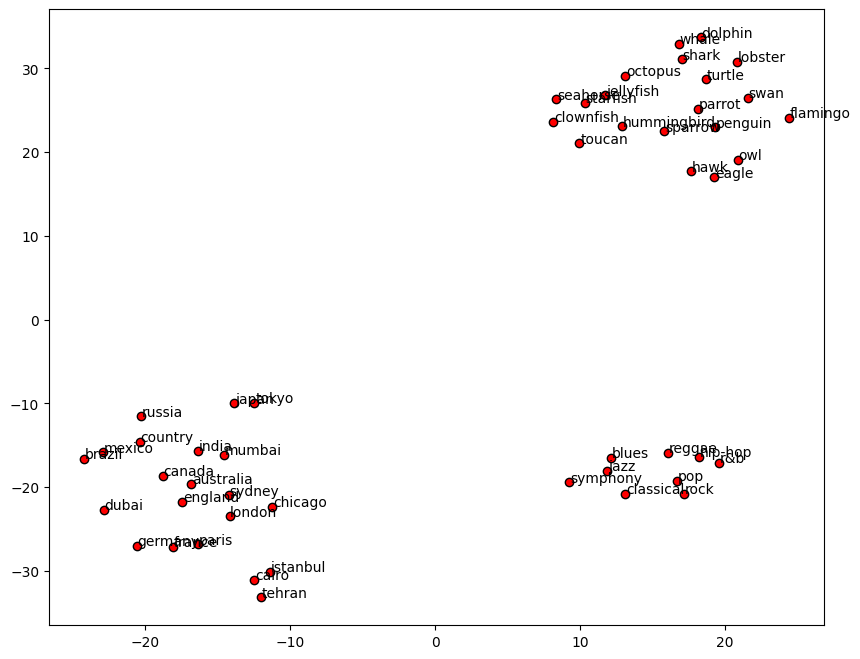

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


words = [
    "dolphin", "shark", "octopus", "jellyfish", "seahorse",
    "turtle", "clownfish", "lobster", "starfish", "whale",
    "eagle", "sparrow", "owl", "hummingbird", "penguin",
    "toucan", "flamingo", "hawk", "parrot", "swan",
    "england", "brazil", "japan", "australia", "india",
    "germany", "canada", "france", "mexico", "russia",
    "chicago", "paris", "tokyo", "london", "sydney",
    "istanbul", "tehran", "cairo", "dubai", "mumbai",
    "symphony", "jazz", "rock", "blues", "reggae",
    "hip-hop", "country", "pop", "classical", "r&b"
]


## WRITE YOUR CODE HERE!
## Use 5 for perplexity of TSNE
def plt_embedding(words, perp=5):
    w_embeds = np.array([model[w] for w in words])
    tsne_model = TSNE(n_components=2, perplexity=perp)
    result = tsne_model.fit_transform(w_embeds)
    plt.figure(figsize=(10, 8))
    plt.scatter(result[:,0], result[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, result):
        plt.text(x + 0.05, y + 0.05, word)

plt_embedding(words)

Analyze the plot and clusters of embeddings in a few sentences.

***WRITE YOUR ANSWER HERE***

According to the plot, we have three clusters: One cluster belongs to different kinds of animals. Another one includes cities, countries and etc. The last cluster represents a lot of music genres.

Overll, it shows that the embedding of similar words are near in distance and also they are apart from the words that don't have many things in common. In Addition, in each cluster we can see that more similar words have shorter distance like shark, whale and dolphin.

### Question 1.3 (15 points)
Find the most similar words to **bat** and **charge** in GloVe.

In [ ]:
## WRITE YOUR CODE HERE!
model.most_similar('bat')

[('bats', 0.691724419593811),
 ('batting', 0.6160588264465332),
 ('balls', 0.5692734122276306),
 ('batted', 0.5530908107757568),
 ('toss', 0.5506128668785095),
 ('wicket', 0.5495278835296631),
 ('pitch', 0.5489361882209778),
 ('bowled', 0.5452010631561279),
 ('hitter', 0.5353438854217529),
 ('batsman', 0.5348091125488281)]

In [ ]:
model.most_similar('charge')

[('charges', 0.8177176117897034),
 ('charged', 0.8067139983177185),
 ('charging', 0.6606977581977844),
 ('guilty', 0.6375356316566467),
 ('accused', 0.6239764094352722),
 ('for', 0.6172690987586975),
 ('responsible', 0.6007314920425415),
 ('month', 0.5919045805931091),
 ('while', 0.5750368237495422),
 ('counts', 0.5714022517204285)]

Now, consider these sentences:
* *The **bat** flew swiftly through the air.*
* *He grabbed his **bat** and headed to the baseball field.*

Or these sentences:
* *I need to **charge** my phone before leaving.*
* *He was arrested for **charge** of theft.*

As you can see, a static vector cannot capture the meaning of a word in every context, and some words have very different meanings in different sentences. In this part, we will work with a masked language model, which captures contextual embeddings. Let's import necessary modules and load the `BERT` [(Devlin et al.)](https://aclanthology.org/N19-1423.pdf) model.

In [ ]:
import torch
from transformers import BertTokenizer, BertModel

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained("bert-base-uncased", output_hidden_states=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

The cell below demonstrates how to input data into the `BERT` model and how to capture word embeddings from each layer.

In [ ]:
test_input = "This is a test"
test_encodings = tokenizer(test_input, return_tensors='pt')
output = model(**test_encodings)
print("Num. of BERT layers:", len(output[-1]))
print("Dimensionality of each layer output (batch_size * num_tokens * embedding_dim): ", output[-1][0].size())

Num. of BERT layers: 13
Dimensionality of each layer output (batch_size * num_tokens * embedding_dim):  torch.Size([1, 6, 768])


In this part, you should analyze the embeddings of the word **bat** in the output of each layer of the `BERT` model for the provided sentences. First, identify the location of the **bat** embedding within the output of each layer for both sentences. Next, calculate the `cosine similarity` between the **bat** embeddings for each layer. Finally, examine the similarity levels of the **bat** embeddings between the two sentences across the various layers of the `BERT` model.

In [ ]:
## WRITE YOUR CODE HERE!
bat_1 = "The bat flew swiftly through the air."
bat_2 = "He grabbed his bat and headed to the baseball field."

## Encode input sentences
encodings_1 = tokenizer(bat_1, return_tensors='pt')
encodings_2 = tokenizer(bat_2, return_tensors='pt')

## Find 'bat' location in each sentence
token_words_1 = tokenizer.convert_ids_to_tokens(encodings_1['input_ids'][0])
token_words_2 = tokenizer.convert_ids_to_tokens(encodings_2['input_ids'][0])
print("First Sentence Tokens: ", token_words_1)
print("Second Sentence Tokens: ", token_words_2)
print("")
bat_idx_1 = token_words_1.index('bat')
bat_idx_2 = token_words_2.index('bat')
print(f"'Bat' is the {bat_idx_1 + 1}-th token in the first sentence.")
print(f"'Bat' is the {bat_idx_2 + 1}-th token in the second sentence.")

## 'bat' embeddings in each layer
output_1 = model(**encodings_1)
output_2 = model(**encodings_2)

## first sentence embeddings
layer_embeds_1 = output_1[-1]
bat_embeds_1 = []
for embeds in layer_embeds_1:
    bat_embeds_1.append(embeds[0][bat_idx_1])

## second sentence embeddings
layer_embeds_2 = output_2[-1]
bat_embeds_2 = []
for embeds in layer_embeds_2:
    bat_embeds_2.append(embeds[0][bat_idx_2])

First Sentence Tokens:  ['[CLS]', 'the', 'bat', 'flew', 'swiftly', 'through', 'the', 'air', '.', '[SEP]']
Second Sentence Tokens:  ['[CLS]', 'he', 'grabbed', 'his', 'bat', 'and', 'headed', 'to', 'the', 'baseball', 'field', '.', '[SEP]']

'Bat' is the 3-th token in the first sentence.
'Bat' is the 5-th token in the second sentence.


In [ ]:
## calculate similarities between embedding of a sentence in different layers
sim_in_sent_1 = []
print("Sentence: ", bat_1)
for idx, embed in enumerate(bat_embeds_1):
    cs = torch.nn.CosineSimilarity(dim=0)
    sim = [cs(embed, emb).item() for emb in bat_embeds_1]
    sim_in_sent_1.append(sim)
    print(f'Similarities of bat embedding in layer {idx+1} with other layers:')
    for index, s in enumerate(sim):
        print(f'layer {index+1}: {s}')
    print("")

Sentence:  The bat flew swiftly through the air.
Similarities of bat embedding in layer 1 with other layers:
layer 1: 0.9999998807907104
layer 2: 0.8621749877929688
layer 3: 0.781710147857666
layer 4: 0.7144138216972351
layer 5: 0.6443666815757751
layer 6: 0.5523238182067871
layer 7: 0.5134338140487671
layer 8: 0.4943072199821472
layer 9: 0.4487411677837372
layer 10: 0.4124460518360138
layer 11: 0.3807237446308136
layer 12: 0.33071255683898926
layer 13: 0.2967490255832672

Similarities of bat embedding in layer 2 with other layers:
layer 1: 0.8621749877929688
layer 2: 1.000000238418579
layer 3: 0.912908673286438
layer 4: 0.8354040384292603
layer 5: 0.7721546292304993
layer 6: 0.6855823993682861
layer 7: 0.6467705965042114
layer 8: 0.6110156774520874
layer 9: 0.5658700466156006
layer 10: 0.5176666975021362
layer 11: 0.492256760597229
layer 12: 0.4395450949668884
layer 13: 0.3717334568500519

Similarities of bat embedding in layer 3 with other layers:
layer 1: 0.781710147857666
layer 2: 

In [ ]:
sim_in_sent_2 = []
print("Sentence: ", bat_2)
for idx, embed in enumerate(bat_embeds_2):
    cs = torch.nn.CosineSimilarity(dim=0)
    sim = [cs(embed, emb).item() for emb in bat_embeds_2]
    sim_in_sent_2.append(sim)
    print(f'Similarities of bat embedding in layer {idx+1} with other layers:')
    for index, s in enumerate(sim):
        print(f'layer {index+1}: {s}')
    print("")

Sentence:  He grabbed his bat and headed to the baseball field.
Similarities of bat embedding in layer 1 with other layers:
layer 1: 1.000000238418579
layer 2: 0.8436372876167297
layer 3: 0.733452558517456
layer 4: 0.6136446595191956
layer 5: 0.5095905661582947
layer 6: 0.449752539396286
layer 7: 0.4189205765724182
layer 8: 0.3985862135887146
layer 9: 0.3793875277042389
layer 10: 0.35721543431282043
layer 11: 0.31594058871269226
layer 12: 0.2585364282131195
layer 13: 0.24260784685611725

Similarities of bat embedding in layer 2 with other layers:
layer 1: 0.8436372876167297
layer 2: 0.9999998807907104
layer 3: 0.8646106719970703
layer 4: 0.7694479823112488
layer 5: 0.6635932922363281
layer 6: 0.5960752367973328
layer 7: 0.56358802318573
layer 8: 0.5275972485542297
layer 9: 0.49851498007774353
layer 10: 0.47605133056640625
layer 11: 0.44283100962638855
layer 12: 0.38933634757995605
layer 13: 0.35410410165786743

Similarities of bat embedding in layer 3 with other layers:
layer 1: 0.7334

In [ ]:
## similarity across sentences
sim_across_sent = []
for idx, embed in enumerate(bat_embeds_1):
    cs = torch.nn.CosineSimilarity(dim=0)
    print(f'Similarities of bat embedding of layer {idx+1} of first sentence with embeddings of second sentecne:')
    sim = [cs(embed, emb).item() for emb in bat_embeds_2]
    sim_across_sent.append(sim)
    for index, sim in enumerate(sim):
        print(f'layer {index+1}: {sim}')
    print()

Similarities of bat embedding of layer 1 of first sentence with embeddings of second sentecne:
layer 1: 0.9575225114822388
layer 2: 0.8128214478492737
layer 3: 0.7087081670761108
layer 4: 0.595879852771759
layer 5: 0.48949527740478516
layer 6: 0.4352138638496399
layer 7: 0.40453147888183594
layer 8: 0.38784313201904297
layer 9: 0.3689630925655365
layer 10: 0.3456370532512665
layer 11: 0.3058454692363739
layer 12: 0.24393567442893982
layer 13: 0.23307716846466064

Similarities of bat embedding of layer 2 of first sentence with embeddings of second sentecne:
layer 1: 0.8322256803512573
layer 2: 0.8337299227714539
layer 3: 0.7391198873519897
layer 4: 0.6528811454772949
layer 5: 0.5566089153289795
layer 6: 0.5122699737548828
layer 7: 0.48538145422935486
layer 8: 0.45212745666503906
layer 9: 0.42541468143463135
layer 10: 0.39828136563301086
layer 11: 0.3561543822288513
layer 12: 0.3032477796077728
layer 13: 0.2725682854652405

Similarities of bat embedding of layer 3 of first sentence with 

Do the same for **charge** provided sentences.

In [ ]:
## WRITE YOUR CODE HERE!
charge_1 = "I need to charge my phone before leaving."
charge_2 = "He was arrested for charge of theft."

## Encode input sentences
encodings_1 = tokenizer(charge_1, return_tensors='pt')
encodings_2 = tokenizer(charge_2, return_tensors='pt')

## Find 'charge' location in each sentence
token_words_1 = tokenizer.convert_ids_to_tokens(encodings_1['input_ids'][0])
token_words_2 = tokenizer.convert_ids_to_tokens(encodings_2['input_ids'][0])
print("First Sentence Tokens: ", token_words_1)
print("Second Sentence Tokens: ", token_words_2)
print("")
charge_idx_1 = token_words_1.index('charge')
charge_idx_2 = token_words_2.index('charge')
print(f"'Charge' is the {charge_idx_1 + 1}-th token in the first sentence.")
print(f"'Charge' is the {charge_idx_2 + 1}-th token in the second sentence.")

## 'charge' embeddings in each layer
output_1 = model(**encodings_1)
output_2 = model(**encodings_2)

## first sentence embeddings
layer_embeds_1 = output_1[-1]
charge_embeds_1 = []
for embeds in layer_embeds_1:
    charge_embeds_1.append(embeds[0][charge_idx_1])

## second sentence embeddings
layer_embeds_2 = output_2[-1]
charge_embeds_2 = []
for embeds in layer_embeds_2:
    charge_embeds_2.append(embeds[0][charge_idx_2])

First Sentence Tokens:  ['[CLS]', 'i', 'need', 'to', 'charge', 'my', 'phone', 'before', 'leaving', '.', '[SEP]']
Second Sentence Tokens:  ['[CLS]', 'he', 'was', 'arrested', 'for', 'charge', 'of', 'theft', '.', '[SEP]']

'Charge' is the 5-th token in the first sentence.
'Charge' is the 6-th token in the second sentence.


In [ ]:
## calculate similarities between embedding of a sentence in different layers
sim_in_sent_1 = []
print("Sentence: ", charge_1)
for idx, embed in enumerate(charge_embeds_1):
    cs = torch.nn.CosineSimilarity(dim=0)
    sim = [cs(embed, emb).item() for emb in charge_embeds_1]
    sim_in_sent_1.append(sim)
    print(f'Similarities of charge embedding in layer {idx+1} with other layers:')
    for index, s in enumerate(sim):
        print(f'layer {index+1}: {s}')
    print("")

Sentence:  I need to charge my phone before leaving.
Similarities of charge embedding in layer 1 with other layers:
layer 1: 1.0
layer 2: 0.7846546769142151
layer 3: 0.653886616230011
layer 4: 0.5747884511947632
layer 5: 0.465848833322525
layer 6: 0.43371447920799255
layer 7: 0.39811405539512634
layer 8: 0.3655730187892914
layer 9: 0.30940109491348267
layer 10: 0.267306387424469
layer 11: 0.2265523076057434
layer 12: 0.20400312542915344
layer 13: 0.192621648311615

Similarities of charge embedding in layer 2 with other layers:
layer 1: 0.7846546769142151
layer 2: 1.0
layer 3: 0.8840153217315674
layer 4: 0.790054202079773
layer 5: 0.689701497554779
layer 6: 0.6436135172843933
layer 7: 0.5861057639122009
layer 8: 0.553778350353241
layer 9: 0.48481541872024536
layer 10: 0.4388442635536194
layer 11: 0.39872580766677856
layer 12: 0.37641867995262146
layer 13: 0.32226940989494324

Similarities of charge embedding in layer 3 with other layers:
layer 1: 0.653886616230011
layer 2: 0.88401532173

In [ ]:
## calculate similarities between embedding of a sentence in different layers
sim_in_sent_2 = []
print("Sentence: ", charge_2)
for idx, embed in enumerate(charge_embeds_2):
    cs = torch.nn.CosineSimilarity(dim=0)
    sim = [cs(embed, emb).item() for emb in charge_embeds_2]
    sim_in_sent_2.append(sim)
    print(f'Similarities of charge embedding in layer {idx+1} with other layers:')
    for index, s in enumerate(sim):
        print(f'layer {index+1}: {s}')
    print("")

Sentence:  He was arrested for charge of theft.
Similarities of charge embedding in layer 1 with other layers:
layer 1: 1.0000001192092896
layer 2: 0.7820063829421997
layer 3: 0.6712489724159241
layer 4: 0.6039261221885681
layer 5: 0.5241208672523499
layer 6: 0.4640491008758545
layer 7: 0.3842926621437073
layer 8: 0.33836451172828674
layer 9: 0.2549557685852051
layer 10: 0.23217695951461792
layer 11: 0.20942100882530212
layer 12: 0.1473187506198883
layer 13: 0.14583633840084076

Similarities of charge embedding in layer 2 with other layers:
layer 1: 0.7820063829421997
layer 2: 1.0
layer 3: 0.9033633470535278
layer 4: 0.8080854415893555
layer 5: 0.7138571739196777
layer 6: 0.6567652225494385
layer 7: 0.5771202445030212
layer 8: 0.524849534034729
layer 9: 0.45568305253982544
layer 10: 0.4210677444934845
layer 11: 0.40106096863746643
layer 12: 0.337318480014801
layer 13: 0.2830500602722168

Similarities of charge embedding in layer 3 with other layers:
layer 1: 0.6712489724159241
layer 2:

In [ ]:
## similarity across sentences
sim_across_sent = []
for idx, embed in enumerate(charge_embeds_1):
    cs = torch.nn.CosineSimilarity(dim=0)
    print(f'Similarities of charge embedding of layer {idx+1} of first sentence with embeddings of second sentecne:')
    sim = [cs(embed, emb).item() for emb in charge_embeds_2]
    sim_across_sent.append(sim)
    for index, sim in enumerate(sim):
        print(f'layer {index+1}: {sim}')
    print()

Similarities of charge embedding of layer 1 of first sentence with embeddings of second sentecne:
layer 1: 0.973694920539856
layer 2: 0.7598669528961182
layer 3: 0.6542379856109619
layer 4: 0.5859935283660889
layer 5: 0.5029579401016235
layer 6: 0.4440789222717285
layer 7: 0.3684220016002655
layer 8: 0.3184411823749542
layer 9: 0.241115540266037
layer 10: 0.22136719524860382
layer 11: 0.19748559594154358
layer 12: 0.13913412392139435
layer 13: 0.13586962223052979

Similarities of charge embedding of layer 2 of first sentence with embeddings of second sentecne:
layer 1: 0.7696080207824707
layer 2: 0.7493430376052856
layer 3: 0.6617261171340942
layer 4: 0.6002020239830017
layer 5: 0.5346354246139526
layer 6: 0.48375993967056274
layer 7: 0.40533578395843506
layer 8: 0.37032219767570496
layer 9: 0.3025132119655609
layer 10: 0.2806844115257263
layer 11: 0.255287766456604
layer 12: 0.22420768439769745
layer 13: 0.19773077964782715

Similarities of charge embedding of layer 3 of first sentenc

Write a few sentences about your results and how `BERT` captures the contextual meaning of words.



***WRITE YOUR ANSWER HERE***

**Similarities between Close Layers:**

Embeddings from nearby layers in BERT tend to exhibit higher cosine similarities. Think of it like layers working together step-by-step. Layer 5, for example, builds upon the understanding developed in layer 4 and refines it further based on the context. This incremental approach leads to higher similarities between embeddings from consecutive layers as they process similar contextual information.

**Capturing Deeper Concepts with Depth:**

As we move towards deeper layers, the focus shifts towards capturing more abstract and sentence-specific meaning. These deeper layers integrate information from previous layers and the entire sentence, resulting in embeddings that might be less similar to those from earlier stages. This reflects BERT's ability to dynamically adjust its understanding of a word based on the complete sentence context.

**Similarities Across Sentences:**

Interestingly, early layers processing the same word in different sentences might show higher similarities compared to deeper layers. This can be attributed to the initial stages focusing on the word's base meaning or a more general interpretation. However, as the model progresses through deeper layers and encounters more context, sentence-specific details become more prominent. This can lead to potentially greater divergence between embeddings for the same word used in different contexts.

**How `BERT` captures the contextual meaning of words?**

Masked Language Modeling (MLM) and attention mechanism help BERT to capture the contexual meaning of words. In the MLM, when a token is masked, the model should predict the masked token based on other tokens. Other token will help the model to understand the context of masked token and predict it correctly.
BERT has transformer as its buliding block that utilize attention mechanism. This mechanism will the model to focus on the parts of a sentence that reveal the context of a certain word and stacking multiple transformers with this method help us to capture more complex patterns.

### Question 1.4 (10 points)
In this part, we will use `BERT` for masked word completion task. Run the following cell to download the pretrained BERT base model (cased).

In [ ]:
from transformers import AutoTokenizer, AutoModelForMaskedLM

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModelForMaskedLM.from_pretrained("bert-base-uncased")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Let's challenge `BERT`'s knowledge about named entities. Consider the following sentences
- **William Shakespeare**, widely regarded as the greatest writer in the English language, was born in Stratford-upon-Avon, England, in 1564.
- The Amazon Rainforest, spanning across nine countries in **South America**,
is the largest tropical rainforest on Earth, covering an area of over 6.7
million square kilometers (2.7 million square miles) and harboring
unparalleled biodiversity.
- The Statue of Liberty, a gift from **France** to the United States, was dedicated
on October 28, 1886. Standing on Liberty Island in New York Harbor, it
symbolizes freedom and democracy and has become a universal symbol of hope and
opportunity.

Replace the bold words with the mask token (if they are more than one token, put as many as needed). Write down the top 5 choices of BERT for the mask tokens. In this part, you should use `token_logits`.

*Hints*

- Use `torch.where` to find the index of a masked token within the input tensor (note that `tokenizer.mask_token_id` gives us the index of the mask token in the vocabulary).
- Use `torch.topk` to get the k largest elements of a given tensor along a given dimension.
- Use `tokenizer.decode([token_id])` to convert a single integer `token_id` to a token string.

In [ ]:
# Define the prediction function
def predict_masked_tokens(sentences):
    for sentence in sentences:
       # Tokenize the input sentence
       tokenized_text = tokenizer.tokenize(sentence)
       # Find the indices of masked tokens
       masked_indices = [i for i, token in enumerate(tokenized_text) if token == "[MASK]"]

       # Predict for each masked token
       for masked_index in masked_indices:
           inputs = tokenizer(sentence, return_tensors="pt")
           outputs = model(**inputs)
           predictions = outputs[0]
           probs = torch.nn.functional.softmax(predictions[0, masked_index], dim=-1)
           top_k_weights, top_k_indices = torch.topk(probs, 5, sorted=True)

           print(f"**Predictions for sentence: {sentence}**")
           print(f"Masked token at index: {masked_index}")
           for i, pred_idx in enumerate(top_k_indices):
               predicted_token = tokenizer.convert_ids_to_tokens([pred_idx])[0]
               token_weight = top_k_weights[i]
               print(f"[{i+1}] {predicted_token} | weights: {float(token_weight):.4f}")
           print()

# Sentences for prediction
sentences = [
    " [MASK] [MASK], widely regarded as the greatest writer in the English language, was born in Stratford-upon-Avon, England, in 1564.",
    "The Amazon Rainforest, spanning across nine countries in [MASK] [MASK], is the largest tropical rainforest on Earth, covering an area of over 6.7 million square kilometers (2.7 million square miles) and harboring unparalleled biodiversity.",
    "The Statue of Liberty, a gift from [MASK] to the United States, was dedicated on October 28, 1886. Standing on Liberty Island in New York Harbor, it symbolizes freedom and democracy and has become a universal symbol of hope and opportunity."
]

# Perform predictions
predict_masked_tokens(sentences)


**Predictions for sentence:  [MASK] [MASK], widely regarded as the greatest writer in the English language, was born in Stratford-upon-Avon, England, in 1564.**
Masked token at index: 0
[1] . | weights: 0.0258
[2] the | weights: 0.0140
[3] , | weights: 0.0117
[4] ) | weights: 0.0102
[5] of | weights: 0.0060

**Predictions for sentence:  [MASK] [MASK], widely regarded as the greatest writer in the English language, was born in Stratford-upon-Avon, England, in 1564.**
Masked token at index: 1
[1] thomas | weights: 0.3534
[2] william | weights: 0.1020
[3] edmund | weights: 0.0824
[4] samuel | weights: 0.0649
[5] henry | weights: 0.0538

**Predictions for sentence: The Amazon Rainforest, spanning across nine countries in [MASK] [MASK], is the largest tropical rainforest on Earth, covering an area of over 6.7 million square kilometers (2.7 million square miles) and harboring unparalleled biodiversity.**
Masked token at index: 9
[1] in | weights: 0.9956
[2] of | weights: 0.0029
[3] within | 

Write a few sentences about your results and how masked language modeling works.

***WRITE YOUR ANSWER HERE***

In the first sentence, particularly with regard to the first token, it's evident that the model encounters difficulty in predicting the initial token, as indicated by the low probabilities assigned. It seems to favor the more probable token without substantial contextual guidance, possibly due to the lack of sufficient surrounding context. However, concerning the second masked token, the model appropriately identifies the necessity for a proper noun, albeit assigning a lower probability to the correct answer, "William."

In the second sentence, the model assigns a high probability to "in" for the first masked token, a choice consistent with the preceding context of "spanning across nine countries," suggesting an expectation for a preposition. Regarding the second token, the appearance of "Africa" and "Asia" among the predictions indicates the model's correct understanding of the need for a continental name.

In the third sentence, once again, the top predictions primarily consist of prepositions, despite the requirement for a noun. This tendency may stem from the model's interpretation of "a gift" and "to the United States," leading it to anticipate the necessity of a prepositional phrase.

**How masked language modeling works?**

Masked Language Modeling (MLM) is a technique where some words in a sentence are masked, or hidden, and the model must predict the correct word to replace the masked one. This helps the model understand the context and meaning of words in a sentence. It's used in training models like BERT to improve language understanding. The model will be trained on huge volumes of text data so that it can learn to recognize word context and forecast masked tokens depending on their context. After predicting a masked token, we will compute loss and backpropagate and the model will gradually learn to predict the correct word for the masked token.

# Part 2: Transfer Learning with BERT (60 points)

<font color='RED' size='+3'>NEW</font>

## Adding a hardware accelerator

Please go to the menu and add a GPU as follows:

`Edit > Notebook Settings > Hardware accelerator > (GPU)`

Run the following cell to confirm that the GPU is detected.

In [1]:
import torch

# Confirm that the GPU is detected

assert torch.cuda.is_available()

# Get the GPU device name.
device_name = torch.cuda.get_device_name()
n_gpu = torch.cuda.device_count()
print(f"Found device: {device_name}, n_gpu: {n_gpu}")

Found device: Tesla T4, n_gpu: 1


<font color='RED' size='+3'>NEW</font>

## Installing Hugging Face's Transformers library
We will use Hugging Face's Transformers (https://github.com/huggingface/transformers), an open-source library that provides general-purpose architectures for natural language understanding and generation with a collection of various pretrained models made by the NLP community. This library will allow us to easily use pretrained models like `BERT` and perform experiments on top of them. We can use these models to solve downstream target tasks, such as text classification, question answering, and sequence labeling.

Run the following cell to install Hugging Face's Transformers library, download data and supporting code for the homework, and install some additional packages. Note that you will be asked to link with your Google Drive account to download some of these files.

In [2]:
!pip install git+https://github.com/huggingface/accelerate
!pip install transformers
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
print('success!')

import os
import zipfile

data_file = drive.CreateFile({'id': '1zeo8FcaNUnhN660mGMNEAPvxOE4DPOnE'})
data_file.GetContentFile('hw1.zip')

# Extract data from the zipfile and put it into the current directory
with zipfile.ZipFile('hw1.zip', 'r') as zip_file:
    zip_file.extractall('./')
os.remove('hw1.zip')
# We will use hw1 as our working directory
os.chdir('hw1')
print("Data and supporting code downloaded!")

pretrained_models_dir = './pretrained_models_dir'
if not os.path.isdir(pretrained_models_dir):
  os.mkdir(pretrained_models_dir)   # directory to save pretrained models
print('model directory created')

!pip install -r requirements.txt
print('everything set up!')

  Cloning https://github.com/huggingface/accelerate to /tmp/pip-req-build-kmtzu47_
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/accelerate /tmp/pip-req-build-kmtzu47_
  Resolved https://github.com/huggingface/accelerate to commit d927b8f3a2ee811a60dbd83d8f12193512b73fc3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


success!
Data and supporting code downloaded!
model directory created
everything set up!


With the advent of methods such as `BERT` [(Devlin et al., 2019)](https://arxiv.org/pdf/1810.04805.pdf), the dominant paradigm for developing NLP models has shifted to transfer learning: first, pretrain a large language model on large amounts of unlabeled data, and then fine-tune the resulting model on the downstream target task. In this section, we will use `BERT` to solve downstream target tasks across several classes of problems, including classification, question answering, and sequence labeling.

### Question 2.1 (25 points)
Before diving into the practical applications, let's first ensure your foundational knowledge is solid. Please answer the following questions briefly, aiming for two or three sentences each. This exercise is designed to prime your understanding of the transformative technologies we're exploring, and making sure you're well-prepared for the hands-on challenges ahead.


**A) Describe the role of the attention mechanism within BERT. How does the multi-head attention mechanism enable BERT to process different parts of the input data simultaneously, and why is this beneficial for natural language understanding tasks?**

**B) Describe how BERT's bidirectionality is different from traditional sequential language models.**

**C) What is segment embedding's functionality in BERT?**

**D) Briefly describe one variant of BERT (e.g., RoBERTa, ALBERT, DistilBERT) and highlight a key difference in its approach or architecture compared to the original BERT model.**

**E) Despite its success, BERT has limitations. Can you identify one limitation or challenge associated with using BERT for NLP tasks?**


***WRITE YOUR ANSWER HERE IN A FEW SENTENCES FOR EACH SECTION***

**A)** BERT's attention mechanism plays a crucial role in its ability to understand the relationships between words in a sentence. It allows the model to focus on different words in the input sequence when producing an output. The multi-head attention mechanism enables BERT to process different parts of the input data simultaneously by splitting the input into multiple heads, each learning a different representation of the data. It performs attention calculations from multiple perspectives simultaneously. Each "head" learns different attention patterns, allowing the model to capture diverse contextual relationships between words. This is beneficial for natural language understanding tasks as it helps the model capture a more comprehensive understanding of the input by considering various contexts and relationships between words.

**B)** Traditional sequential language models process input data in a sequential manner (Left to Right), with each output depending on the previous input. In contrast, BERT uses a bidirectional approach (Left to Right, Right to Left), where the model processes the input data in both directions simultaneously. This means that BERT can consider both the preceding and following words in the input sequence when generating an output, allowing it to capture a more nuanced understanding of the input data and better handle complex language tasks.

**C)** In BERT, segment embeddings are used to differentiate between two types of input sequences, such as two sentences in a sentence-pair task. The segment embeddings are added to the token embeddings, which represent the individual words in the input sequence. This allows BERT to distinguish between the two input sequences and process them separately, even though they are combined into a single input sequence. By using segment embeddings, BERT can handle various natural language understanding tasks, such as question-answering and natural language inference, where it is important to differentiate between the input sequences.

**D)** RoBERTa is a variant of BERT that was developed to improve the performance of the original BERT model. These are key differences between two models:

* RoBERTa trains on a massive dataset of text, compared to BERT. This allows it to develop a richer and more detailed understanding of language.
* Unlike BERT's static masking, RoBERTa uses a dynamic approach. It hides different words in each training example, forcing it to learn from a wider variety of contexts.
* RoBERTa skips the "next sentence prediction" step used during BERT's training. This allows it to concentrate solely on understanding masked words, leading to a more versatile language representation.
* RoBERTa utilizes a larger vocabulary. This enables it to capture the finer details of language compared to BERT.
* RoBERTa undergoes a more intensive fine-tuning process compared to BERT. This involves longer training periods and adjustments to learning rates. This allows RoBERTa to adapt more effectively to specific natural language processing tasks.

**E)**


BERT has a large model size that will cause computational issues:
*   **Memory Requirements**: Running BERT models can require a large amount of memory, especially for models with a high number of parameters. This can limit its deployment on devices with limited memory, like mobile phones or embedded systems.

* **Inference Speed**: Making predictions with a pre-trained BERT model can be computationally expensive. This can be an issue for tasks requiring real-time responses, such as chatbots or voice assistants.



After answering the above questions, let's run the cell below to import necessary packages and set some things up for fine-tuning `BERT`.

In [3]:
# coding=utf-8

import dataclasses
import logging
import math
import os
import timeit
from dataclasses import dataclass, field
from typing import Callable, Dict, List, Tuple, Optional

import numpy as np
from seqeval.metrics import accuracy_score, f1_score, precision_score, recall_score
import torch
from torch.utils.data import DataLoader, SequentialSampler
from tqdm import tqdm

from transformers import (
    AutoConfig,
    AutoModelWithLMHead,
    AutoModelForSequenceClassification,
    AutoModelForQuestionAnswering,
    AutoModelForTokenClassification,
    AutoTokenizer,
    PreTrainedTokenizer,
    EvalPrediction
)
from transformers import (
    GlueDataset,
    SquadDataset,
    LineByLineTextDataset,
    TextDataset,
    DataCollatorForLanguageModeling,
)
from transformers import GlueDataTrainingArguments, SquadDataTrainingArguments
from transformers import (
    Trainer,
    TrainingArguments,
    glue_compute_metrics,
    glue_output_modes,
    glue_tasks_num_labels,
    set_seed,
)
from transformers.data.processors.squad import SquadResult
from transformers.data.metrics.squad_metrics import (
    compute_predictions_logits,
    squad_evaluate,
)
from tasks import NER
from utils_ner import Split, TokenClassificationDataset, TokenClassificationTask

from transformers import glue_processors
from transformers.data.processors.utils import InputExample
from langdetect import detect

logger = logging.getLogger(__name__)


@dataclass
class ModelArguments:
    """
    Arguments pertaining to which model/config/tokenizer we are going to fine-tune from.
    """
    model_type: str = field(
        default="bert",
        metadata={"help": "Model type, e.g., bert."}
    )
    model_name_or_path: str = field(
        default="bert",
        metadata={"help": "Path to pretrained model or model identifier from huggingface.co/models."}
    )
    do_lower_case: Optional[bool] = field(
        default=False,
        metadata={"help": "Whether you want to do lower case on input before tokenization."}
    )
    model_cache_dir: Optional[str] = field(
        default=None,
        metadata={"help": "Where you want to store the pretrained models downloaded from s3."}
    )
    data_cache_dir: Optional[str] = field(
        default=None,
        metadata={"help": "Where you want to store the cached features for the task."}
    )


@dataclass
class NerDataTrainingArguments:
    """
    Arguments pertaining to what data we are going to input our model for training and eval.
    """

    data_dir: str = field(
        metadata={"help": "The input data dir. Should contain data files for the task."}
    )
    labels: Optional[str] = field(
        default=None,
        metadata={"help": "Path to a file containing all labels for the task."},
    )
    max_seq_length: int = field(
        default=128,
        metadata={
            "help": "The maximum total input sequence length after tokenization. Sequences longer "
            "than this will be truncated, sequences shorter will be padded."
        },
    )
    overwrite_cache: bool = field(
        default=False, metadata={"help": "Overwrite the cached training and evaluation sets."}
    )


@dataclass
class LMDataTrainingArguments:
    """
    Arguments pertaining to what data we are going to input our model for training and eval.
    """

    train_data_file: Optional[str] = field(
        default=None, metadata={"help": "The input training data file (a text file)."}
    )
    eval_data_file: Optional[str] = field(
        default=None,
        metadata={"help": "An optional input evaluation data file to evaluate the perplexity on (a text file)."},
    )
    line_by_line: bool = field(
        default=False,
        metadata={"help": "Whether distinct lines of text in the dataset are to be handled as distinct sequences."},
    )

    mlm: bool = field(
        default=False, metadata={"help": "Train with masked-language modeling loss instead of language modeling."}
    )
    mlm_probability: float = field(
        default=0.15, metadata={"help": "Ratio of tokens to mask for masked language modeling loss"}
    )
    block_size: int = field(
        default=-1,
        metadata={
            "help": "Optional input sequence length after tokenization."
            "The training dataset will be truncated in block of this size for training."
            "Default to the model max input length for single sentence inputs (take into account special tokens)."
        },
    )
    overwrite_cache: bool = field(
        default=False, metadata={"help": "Overwrite the cached training and evaluation sets"}
    )


def get_dataset(
    args: LMDataTrainingArguments,
    tokenizer: PreTrainedTokenizer,
    evaluate: bool = False,
    cache_dir: Optional[str] = None,
):
    file_path = args.eval_data_file if evaluate else args.train_data_file
    if args.line_by_line:
        return LineByLineTextDataset(tokenizer=tokenizer, file_path=file_path, block_size=args.block_size)
    else:
        return TextDataset(
            tokenizer=tokenizer,
            file_path=file_path,
            block_size=args.block_size,
            overwrite_cache=args.overwrite_cache,
            cache_dir=cache_dir,
        )


DATA_TRAINING_ARGUMENTS = {
    "text_classification": GlueDataTrainingArguments,
    "question_answering": SquadDataTrainingArguments,
    "sequence_labeling": NerDataTrainingArguments,
}


AUTO_MODEL = {
    "text_classification": AutoModelForSequenceClassification,
    "question_answering": AutoModelForQuestionAnswering,
    "sequence_labeling": AutoModelForTokenClassification,
}


DATASET = {
    "text_classification": GlueDataset,
    "question_answering": SquadDataset,
    "sequence_labeling": TokenClassificationDataset,
}


# some functions for fine-tuning BERT on a downstream target task
def do_target_task_finetuning(model_name_or_path, task_type, output_dir, **kwargs):
    r""" Fine-tuning BERT on a downstream target task.
    Params:
        **model_name_or_path**: either:
            - a string with the `shortcut name` of a pre-trained model configuration to load from cache
                or download and cache if not already stored in cache (e.g. 'bert-base-uncased').
            - a path to a `directory` containing a configuration file saved
                using the `save_pretrained(save_directory)` method.
            - a path or url to a saved configuration `file`.
        **task_type**: string:
            The class of the task to train, selected in
            ["text_classification", "question_answering", "sequence_labeling"].
        **output_dir**: string:
            The output directory where the model predictions and checkpoints will be written.
        **kwargs**: (`optional`) dict:
            Dictionary of key/value pairs with which to update the configuration object after loading.
            - The values in kwargs of any keys which are configuration attributes will be used
            to override the loaded values.
    """
    # See all possible arguments in src/transformers/training_args.py

    assert task_type in DATA_TRAINING_ARGUMENTS
    model_args = ModelArguments(model_name_or_path=model_name_or_path)
    data_args_params = {}
    for param in ["task_name", "data_dir"]:
        if param in kwargs:
            data_args_params.update({param: kwargs[param]})

    data_args = DATA_TRAINING_ARGUMENTS[task_type](**data_args_params)
    training_args = TrainingArguments(output_dir=output_dir)

    # override the loaded configs
    configs = (model_args, data_args, training_args)
    for config in configs:
        for key, value in kwargs.items():
            if hasattr(config, key):
                setattr(config, key, value)

    if (
        os.path.exists(training_args.output_dir)
        and os.listdir(training_args.output_dir)
        and training_args.do_train
        and not training_args.overwrite_output_dir
    ):
        raise ValueError(
            f"Output directory ({training_args.output_dir}) already exists and is not empty. "
            f"Use --overwrite_output_dir to overcome."
        )

    for p in [model_args.model_cache_dir, model_args.data_cache_dir, training_args.output_dir]:
        if not os.path.exists(p):
            os.makedirs(p)

    # Setup logging
    logging.basicConfig(
        format="%(asctime)s - %(levelname)s - %(name)s -   %(message)s",
        datefmt="%m/%d/%Y %H:%M:%S",
        level=logging.INFO,
    )

    logger.info("Process device: %s, n_gpu: %s", training_args.device, training_args.n_gpu)
    logger.info("Training/evaluation parameters %s", training_args)


    # Set seed
    set_seed(training_args.seed)

    if task_type == "text_classification":
        try:
            data_args.task_name = data_args.task_name.lower()
            num_labels = glue_tasks_num_labels[data_args.task_name]
            output_mode = glue_output_modes[data_args.task_name]
        except KeyError:
            raise ValueError("Task not found: %s" % (data_args.task_name))
    elif task_type == "sequence_labeling":
        token_classification_task = NER() # You might want to this to Chunk() or POS()
        # if you are working with a Chunk or POS task, respectively
        labels = token_classification_task.get_labels(data_args.labels)
        label_map: Dict[int, str] = {i: label for i, label in enumerate(labels)}
        num_labels = len(labels)

    # Load pretrained model and tokenizer

    AutoModel = AUTO_MODEL[task_type]
    auto_config_params = {
        'pretrained_model_name_or_path': model_args.model_name_or_path,
        'cache_dir': model_args.model_cache_dir,
    }

    if task_type == "text_classification":
        auto_config_params.update({
            "num_labels": num_labels,
            "finetuning_task": data_args.task_name,
        })
    elif task_type == "sequence_labeling":
        auto_config_params.update({
            "num_labels": num_labels,
            "id2label": label_map,
            "label2id": {label: i for i, label in enumerate(labels)},
        })

    config = AutoConfig.from_pretrained(**auto_config_params)

    auto_tokenizer_params = {
        "pretrained_model_name_or_path": model_args.model_name_or_path,
        "cache_dir": model_args.model_cache_dir,
        "do_lower_case": model_args.do_lower_case,
    }
    tokenizer = AutoTokenizer.from_pretrained(**auto_tokenizer_params)

    auto_model_params = {
        "pretrained_model_name_or_path": model_args.model_name_or_path,
        "from_tf": False,
        "config": config,
        "cache_dir": model_args.model_cache_dir,
    }

    if "model_load_mode" in kwargs and kwargs["model_load_mode"] == "base_model_only":
        WEIGHTS_NAME = "pytorch_model.bin"
        archive_file = os.path.join(model_args.model_name_or_path, WEIGHTS_NAME)
        # Use torch.load with map_location=torch.device() to map the pretrained model to our device.
        model_state_dict = torch.load(archive_file, map_location=torch.device(training_args.device))

        state_dict_with_prefix = {}
        for key, value in model_state_dict.items():
            if key.startswith(model_args.model_type):
                state_dict_with_prefix[key] = value

        auto_model_params.update({"state_dict": state_dict_with_prefix})

    model = AutoModel.from_pretrained(**auto_model_params)

    # Get datasets
    Dataset = DATASET[task_type]
    dataset_params = {
        "tokenizer": tokenizer,
    }
    if task_type == "sequence_labeling":
        dataset_params.update({
            "token_classification_task": token_classification_task,
            "data_dir": data_args.data_dir,
            "labels": labels,
            "model_type": model_args.model_type,
            "max_seq_length": data_args.max_seq_length
        })

    else:
        dataset_params.update({
            "args": data_args,
            "cache_dir": model_args.data_cache_dir,
        })

    train_dataset = (Dataset(**dataset_params) if training_args.do_train else None)

    dataset_params.update({"mode": Split.dev if task_type == "sequence_labeling" else "dev"})
    eval_dataset = (Dataset(**dataset_params) if training_args.do_eval else None)

    # Initialize our Trainer
    trainer_params = {
        "model": model,
        "args": training_args,
        "train_dataset": train_dataset,
        "eval_dataset": eval_dataset,
    }
    trainer = Trainer(**trainer_params)

    # Training
    if training_args.do_train:
        trainer.train(
            model_path=model_args.model_name_or_path if os.path.isdir(model_args.model_name_or_path) else None
        )
        trainer.save_model()
        # For convenience, we also re-save the tokenizer to the same directory
        tokenizer.save_pretrained(training_args.output_dir)

    # Evaluation
    eval_results = {}
    if training_args.do_eval:
        if task_type == "text_classification":
            def build_compute_metrics_fn(task_name: str) -> Callable[[EvalPrediction], Dict]:
                def compute_metrics_fn(p: EvalPrediction):
                    if output_mode == "classification":
                        preds = np.argmax(p.predictions, axis=1)
                    elif output_mode == "regression":
                        preds = np.squeeze(p.predictions)
                    return glue_compute_metrics(task_name, preds, p.label_ids)
                return compute_metrics_fn

            logger.info("*** Evaluate ***")
            # Loop to handle MNLI double evaluation (matched, mis-matched)
            eval_datasets = [eval_dataset]
            if data_args.task_name == "mnli":
                mnli_mm_data_args = dataclasses.replace(data_args, task_name="mnli-mm")
                eval_datasets.append(
                    Dataset(mnli_mm_data_args, tokenizer=tokenizer, mode="dev", cache_dir=model_args.data_cache_dir)
                )

            for eval_dataset in eval_datasets:
                trainer.compute_metrics = build_compute_metrics_fn(eval_dataset.args.task_name)
                eval_result = trainer.evaluate(eval_dataset=eval_dataset)

                output_eval_file = os.path.join(training_args.output_dir, f"eval_results.txt")
                with open(output_eval_file, "w") as writer:
                    logger.info("***** Eval results *****")
                    for key, value in eval_result.items():
                        logger.info("  %s = %s", key, value)
                        writer.write("%s = %s\n" % (key, value))

                eval_results.update(eval_result)

        elif task_type == "question_answering":
            # We don't use trainer.evaluate here since it currently does not support question answering tasks
            # (https://github.com/huggingface/transformers/issues/7032)
            model = AutoModel.from_pretrained(model_args.model_cache_dir)
            tokenizer = AutoTokenizer.from_pretrained(model_args.model_cache_dir, do_lower_case=model_args.do_lower_case)
            model.to(training_args.device)


            dataset = eval_dataset.dataset
            examples = eval_dataset.examples
            features = eval_dataset.features
            eval_batch_size = training_args.per_gpu_eval_batch_size * max(1, training_args.n_gpu)

            eval_sampler = SequentialSampler(dataset)
            eval_dataloader = DataLoader(dataset, sampler=eval_sampler, batch_size=eval_batch_size)

            logger.info("*** Evaluate ***")
            description = "Evaluation"
            logger.info("***** Running %s *****", description)
            logger.info("  Num examples = %d", len(dataset))
            logger.info("  Batch size = %d", eval_batch_size)

            all_results = []
            start_time = timeit.default_timer()

            for batch in tqdm(eval_dataloader, desc=description):
                model.eval()
                batch = tuple(t.to(training_args.device) for t in batch)

                with torch.no_grad():
                    inputs = {
                        "input_ids": batch[0],
                        "attention_mask": batch[1],
                        "token_type_ids": batch[2],
                    }
                    feature_indices = batch[3]
                    outputs = model(**inputs)

                for i, feature_index in enumerate(feature_indices):
                    eval_feature = features[feature_index.item()]
                    unique_id = int(eval_feature.unique_id)
                    output = [output[i].detach().cpu().tolist() for output in outputs]
                    start_logits, end_logits = output
                    result = SquadResult(unique_id, start_logits, end_logits)
                    all_results.append(result)

            evalTime = timeit.default_timer() - start_time
            logger.info("  Evaluation done in total %f secs (%f sec per example)", evalTime, evalTime / len(dataset))

            # Compute predictions
            output_prediction_file = os.path.join(training_args.output_dir, "predictions.json")
            output_nbest_file = os.path.join(training_args.output_dir, "nbest_predictions.json")

            output_null_log_odds_file = os.path.join(training_args.output_dir, "null_odds.json") \
                if data_args.version_2_with_negative else None

            predictions = compute_predictions_logits(
                all_examples=examples,
                all_features=features,
                all_results=all_results,
                n_best_size=data_args.n_best_size,
                max_answer_length=data_args.max_answer_length,
                do_lower_case=model_args.do_lower_case,
                output_prediction_file=output_prediction_file,
                output_nbest_file=output_nbest_file,
                output_null_log_odds_file=output_null_log_odds_file,
                verbose_logging=False,
                version_2_with_negative=data_args.version_2_with_negative,
                null_score_diff_threshold=data_args.null_score_diff_threshold,
                tokenizer=tokenizer,
            )

            # Compute the F1 and exact scores.
            eval_result = squad_evaluate(examples, predictions)

            output_eval_file = os.path.join(training_args.output_dir, f"eval_results.txt")
            with open(output_eval_file, "w") as writer:
                logger.info("***** Eval results *****")
                for key, value in eval_result.items():
                    logger.info("  %s = %s", key, value)
                    writer.write("%s = %s\n" % (key, value))

            eval_results.update(eval_result)


        elif task_type == "sequence_labeling":
            def align_predictions(predictions: np.ndarray, label_ids: np.ndarray) -> Tuple[List[int], List[int]]:
                preds = np.argmax(predictions, axis=2)
                batch_size, seq_len = preds.shape
                label_list = [[] for _ in range(batch_size)]
                pred_list = [[] for _ in range(batch_size)]

                for i in range(batch_size):
                    for j in range(seq_len):
                        if label_ids[i, j] != torch.nn.CrossEntropyLoss().ignore_index:
                            label_list[i].append(label_map[label_ids[i][j]])
                            pred_list[i].append(label_map[preds[i][j]])
                return pred_list, label_list

            def compute_metrics_fn(p: EvalPrediction) -> Dict:
                pred_list, label_list = align_predictions(p.predictions, p.label_ids)
                return {
                    "accuracy_score": accuracy_score(label_list, pred_list),
                    "precision": precision_score(label_list, pred_list),
                    "recall": recall_score(label_list, pred_list),
                    "f1": f1_score(label_list, pred_list),
                }

            trainer.compute_metrics = compute_metrics_fn
            eval_result = trainer.evaluate(eval_dataset=eval_dataset)

            output_eval_file = os.path.join(training_args.output_dir, f"eval_results.txt")
            with open(output_eval_file, "w") as writer:
                logger.info("***** Eval results *****")
                for key, value in eval_result.items():
                    logger.info("  %s = %s", key, value)
                    writer.write("%s = %s\n" % (key, value))

            eval_results.update(eval_result)

        else:
            raise ValueError("Invalid task type.")
    return eval_results


print('setup complete')

setup complete


## Fine-tuning BERT for text classification
Now, let's use `BERT` to solve a sentiment classification task. Specifically, we'll be using the Stanford Sentiment Treebank [(Socher et al., 2013)](https://nlp.stanford.edu/~socherr/EMNLP2013_RNTN.pdf), which was constructed from movie reviews data. We provide code to fine-tune BERT in a separate ["useful code" Colab notebook](https://colab.research.google.com/drive/1nJWA9rPkPrjjjtwN_vKUSQoomdfWLAFV?usp=sharing), so check that out if you're interested. However, since training on the full `SST` dataset (67K examples) takes a while, we provide you with a fine-tuned model to save time. Run the following cell to download the model.



<font color='RED' size='+3'>NEW</font>

In [ ]:
data_file = drive.CreateFile({'id': '1ZJ1_gWahH_OOBIrRm0aN9i8nvLB2olZC'})
data_file.GetContentFile('bert-base-cased-finetuned-sst.zip')

# Extract the data from the zipfile and put it into pretrained_models_dir
with zipfile.ZipFile('bert-base-cased-finetuned-sst.zip', 'r') as zip_file:
    zip_file.extractall(pretrained_models_dir)
os.remove('bert-base-cased-finetuned-sst.zip')
print("bert-base-cased-finetuned-sst downloaded!")

bert-base-cased-finetuned-sst downloaded!


### Question 2.2 (5 points)
Let's use the trained model to predict the sentiment of a given sentence. We will make a few predictions in the code below. Your task is to complete the code to print out the model's predicted probability distribution for each sentence.

*Hint:*

*   `model(inputs)[0]` gives you the logits of the model for `inputs`.

In [ ]:
# Load the trained model and make a few predictions
model_name_or_path = "bert-base-cased-finetuned-sst"
pretrained_weights = os.path.join(pretrained_models_dir, model_name_or_path)
task_type = "text_classification"
model = AUTO_MODEL[task_type].from_pretrained(pretrained_weights)
tokenizer = AutoTokenizer.from_pretrained(pretrained_weights)

classes = ["negative", "positive"]

sentence_1 = "the movie has something interesting to say"
sentence_2 = "it was so awful that i walked out after 30 minutes :("

inputs_1 = tokenizer.encode(sentence_1, add_special_tokens=True, return_tensors="pt")
inputs_2 = tokenizer.encode(sentence_2, add_special_tokens=True, return_tensors="pt")

# YOUR CODE HERE!
probabilities_1 = torch.nn.functional.softmax(model(inputs_1)[0], dim=-1)[0].tolist()
probabilities_2 = torch.nn.functional.softmax(model(inputs_2)[0], dim=-1)[0].tolist()

print('Sentence: ', sentence_1)
print('Prob for negative class: ', probabilities_1[0])
print('Prob for positive class: ', probabilities_1[1])

print()

print('Sentence: ', sentence_2)
print('Prob for negative class: ', probabilities_2[0])
print('Prob for positive class: ', probabilities_2[1])

Sentence:  the movie has something interesting to say
Prob for negative class:  0.0011133861262351274
Prob for positive class:  0.9988866448402405

Sentence:  it was so awful that i walked out after 30 minutes :(
Prob for negative class:  0.9978280663490295
Prob for positive class:  0.002171869855374098


### Question 2.3 (5 points)
Come up with a new sentence that the model gets wrong. The sentence must contain some sentiment (i.e., it cannot be neutral), and the model should place a higher probability on the wrong label than the correct one. Show the model's prediction on this new sentence.

In [ ]:
your_sentence = "Sure, if you enjoy watching paint dry for two hours, this masterpiece is for you!" # change to your sentence
your_sentence_sentiment = 'negative' # change to your sentence's ground-truth sentiment
your_model_prediction = [] # obviously, change this to the model's prediction on your sentence

# YOUR CODE HERE
sent = tokenizer.encode(your_sentence, add_special_tokens=True, return_tensors="pt")
probabilities = torch.nn.functional.softmax(model(sent)[0], dim=-1)
your_model_prediction = probabilities[0].tolist()


print('your sentence: "%s"\nground-truth label: %s\npredicted negative prob: %0.2f\npredicted positive prob: %0.2f'\
      % (your_sentence, your_sentence_sentiment, your_model_prediction[0], your_model_prediction[1]))

your sentence: "Sure, if you enjoy watching paint dry for two hours, this masterpiece is for you!"
ground-truth label: negative
predicted negative prob: 0.01
predicted positive prob: 0.99


### Question 2.4 (5 points)
Provide a reasonable explanation as to why the model got your sentence wrong. Also provide a plausible method to improve the underlying sentiment model so that this kind of error stops happening.


***WRITE YOUR ANSWER HERE IN A FEW SENTENCES***

This sentence has some kind of `Sarcasm` in it and that is why the model predicted wrong class for it. In a text with sarcasm, although we say something positive apparently, but we mean something negative actually. LMs usually have this weakness to detect this sentences correctly.

To overcome this problem, a solution could be fine-tuning on dataset with sarcastic text. It will help the model to recognize this kind of text and classifiy them correctly.

## Fine-tuning BERT for question answering
In this section, we will use `BERT` for a question answering task, i.e., `SQuAD` [(Rajpurkar et al., 2016)](https://nlp.stanford.edu/pubs/rajpurkar2016squad.pdf) whose dataset was built from Wikipedia. Training on the full `SQuAD` dataset (108K examples) would takes a couple of hours, so we will provide you with a trained model to save your time. Run the following cell to download the model.

In [4]:
data_file = drive.CreateFile({'id': '19cnGSN88KlRJRcIqwxw3C4ylJftdkZ2W'})
data_file.GetContentFile('bert-base-cased-finetuned-squad.zip')

# Extract the data from the zipfile and put it into pretrained_models_dir
with zipfile.ZipFile('bert-base-cased-finetuned-squad.zip', 'r') as zip_file:
    zip_file.extractall(pretrained_models_dir)
os.remove('bert-base-cased-finetuned-squad.zip')
print("bert-base-cased-finetuned-squad downloaded!")

bert-base-cased-finetuned-squad downloaded!


### Question 2.5 (10 points)

Okay, same drill as before! Your task is to complete the code to show the model's predicted answer to each question. If you forgot how `BERT` solves extractive question answering tasks, check out Section 4.2 and Figure 1 / Figure 4c) in the [BERT paper](https://arxiv.org/pdf/1810.04805.pdf). Your output should be three strings, each corresponding to the answer of one of the three given questions.

*Hints*

*   `model(**inputs)]` gives you the start and end logits of the model for  `inputs`.
*   Use `tokenizer.convert_tokens_to_string` to convert a sequence of tokens (string) into a single string.
*   Use `tokenizer.convert_ids_to_tokens` to convert a sequence of indices into a sequence of tokens.

In [5]:
task_name = "SQuAD"
model_name_or_path = "bert-base-cased-finetuned-squad"
pretrained_weights = os.path.join(pretrained_models_dir, model_name_or_path)
task_type = "question_answering"
model = AUTO_MODEL[task_type].from_pretrained(pretrained_weights)
tokenizer = AutoTokenizer.from_pretrained(pretrained_weights)

context = """This course will broadly focus on deep learning methods for
natural language processing. Most of the semester will focus on very recent
transfer learning methods that have significantly pushed forward the state of
the art. It is intended for graduate students in computer science and
linguistics who are (1) interested in learning about cutting-edge research
progress in NLP and (2) familiar with machine learning fundamentals. We will
cover modeling architectures, training objectives, and downstream tasks (e.g.,
text classification, question answering, and text generation). Coursework
includes reading recent research papers, programming assignments, and a final
project. This class will be asynchronous: lectures will be prerecorded and
posted on a weekly basis, along with accompanying readings and assignments."""

questions = [
    "What is the focus of this course?",
    "Who is this course intended for?",
    "What is the coursework?",
]

for question in questions:
    inputs = tokenizer.encode_plus(question, context, add_special_tokens=True, return_tensors="pt")
    input_ids = inputs["input_ids"].tolist()[0]


    # YOUR CODE HERE!
    # Predict start and end logits
    with torch.no_grad():
        outputs = model(**inputs)
        start_logits, end_logits = outputs.start_logits, outputs.end_logits

    # Identify the most likely answer span
    answer_start = torch.argmax(start_logits).item()
    answer_end = torch.argmax(end_logits).item()

    # Validate answer span (ensure it's within context bounds)
    if answer_end < answer_start or answer_end >= len(input_ids):
        print(f"Question: {question}")
        print("Invalid answer span detected. Skipping prediction.")
        continue

    # Convert answer tokens back to text
    answer_tokens = tokenizer.convert_ids_to_tokens(input_ids[answer_start:answer_end+1])
    answer = tokenizer.convert_tokens_to_string(answer_tokens)

    print(f"Question: {question}")
    print(f"Predicted Answer: {answer}")
    print()


Some weights of the model checkpoint at ./pretrained_models_dir/bert-base-cased-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Question: What is the focus of this course?
Predicted Answer: deep learning methods for natural language processing

Question: Who is this course intended for?
Predicted Answer: graduate students in computer science and linguistics

Question: What is the coursework?
Predicted Answer: reading recent research papers, programming assignments, and a final project



### Question 2.6 (5 points)
Come up with a new question about this passage that the model gets wrong. The question must be answerable by the passage (i.e., its ground-truth answer should be a span of text within the passage). Show the model's predicted answer on this new sentence.

In [7]:
your_question = 'What prerequisites are recommended for students interested in enrolling in the course?' # change to your question
your_answer = '(1) interested in learning about cutting-edge research progress in NLP and (2) familiar with machine learning fundamentals' # change to your sentence's ground-truth answer
your_model_prediction = '' # obviously, change this to the model's predicted answer span


# YOUR CODE HERE
inputs = tokenizer.encode_plus(your_question, context, add_special_tokens=True, return_tensors="pt")
input_ids = inputs["input_ids"].tolist()[0]


# Predict start and end logits
with torch.no_grad():
    outputs = model(**inputs)
    start_logits, end_logits = outputs.start_logits, outputs.end_logits

# Identify the most likely answer span
answer_start = torch.argmax(start_logits).item()
answer_end = torch.argmax(end_logits).item()

# Validate answer span (ensure it's within context bounds)
if answer_end < answer_start or answer_end >= len(input_ids):
    print(f"Question: {question}")
    print("Invalid answer span detected. Skipping prediction.")

# Convert answer tokens back to text
answer_tokens = tokenizer.convert_ids_to_tokens(input_ids[answer_start:answer_end+1])
answer = tokenizer.convert_tokens_to_string(answer_tokens)
your_model_prediction = answer.replace(" ##", "")  # Remove separator token if present


print('your question: "%s"\nground-truth answer: %s\npredicted answer: %s'\
      % (your_question, your_answer, your_model_prediction))

your question: "What prerequisites are recommended for students interested in enrolling in the course?"
ground-truth answer: prerecorded
predicted answer: [CLS]


### Question 2.7 (5 points)
Provide a reasonable explanation as to why the model got your question wrong. Also provide a plausible method to improve the underlying QA model so that this kind of error stops happening.

***WRITE YOUR ANSWER HERE IN A FEW SENTENCES***

It is obvious that model failed to answer this question and just returned [CLS] token.

It could have several reasons. One reason could be beucase of the fact that model couldn't actually understand that what question wanted. In the context, we do not have a direct reference to `prerequisites` but we had the expression that say that it was intended for which kind of students. On the other side, this question has a longer answer than the previous question. Maybe the model has problen to capture long term denepdencies.

One strategy to overcome this problem could be fine-tuning on question-answering dataset that had more diverse set of questions to help the model really capture the context of question. Also we need to have longer answers in this dataset to improve dependency range of the model

## AI Disclosure

*   Did you use any AI assistance to complete this homework? If so, please also specify what AI you used.
    * ChatGPT / Gemini


---
*(only complete the below questions if you answered yes above)*

*   If you used a large language model to assist you, please paste *all* of the prompts that you used below. Add a separate bullet for each prompt, and specify which problem is associated with which prompt.
    * Link to chatgpt responses: https://chat.openai.com/share/f05c63dc-0c21-448d-9864-b073db60a731
    * Link to Gemini responses: https://g.co/gemini/share/5ea5443ed6ed
*   **Free response**: For each problem for which you used assistance, describe your overall experience with the AI. How helpful was it? Did it just directly give you a good answer, or did you have to edit it? Was its output ever obviously wrong or irrelevant? Did you use it to get the answer or check your own answer?
    * It depends on the the type of question. For some of the question, it gave me completely correct answers. For example for most of coding and explanation question, Responses had good quality but for questions that need to generate a question or text based on the conditions or interpreting results, there were some mistakes.
    * I used in both cases, getting the answer and checking the answer. I also used them to improve the quality of my reports for questions by asking them to rewrite them.
    * I utilized both Gemini and ChatGPT and each of them was better in some usecases but in overall Gemini had better results.
